In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import plot

df = pd.read_csv('RELIANCE.csv')

In [2]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [3]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,2020-05-22,RELIANCE,EQ,1441.25,1451.80,1458.00,1426.50,1433.00,1431.55,1442.31,17458503,2.518059e+15,388907.0,4083814.0,0.2339
5071,2020-05-26,RELIANCE,EQ,1431.55,1448.15,1449.70,1416.30,1426.00,1424.05,1428.70,15330793,2.190317e+15,341795.0,7437964.0,0.4852
5072,2020-05-27,RELIANCE,EQ,1424.05,1431.00,1454.00,1412.00,1449.85,1445.55,1430.20,16460764,2.354223e+15,348477.0,6524302.0,0.3964
5073,2020-05-28,RELIANCE,EQ,1445.55,1455.00,1479.75,1449.00,1471.05,1472.25,1467.50,18519252,2.717698e+15,405603.0,8377100.0,0.4523


In [4]:
x = df.drop(['Date','Symbol','Series','Trades','Deliverable Volume','%Deliverble', 'Close'], axis = 1)

In [5]:
x.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover
0,233.05,237.50,251.70,237.50,251.70,249.37,4456424,1.111319e+14
1,251.70,258.40,271.85,251.30,271.85,263.52,9487878,2.500222e+14
2,271.85,256.65,287.90,256.65,286.75,274.79,26833684,7.373697e+14
3,282.50,289.00,300.70,289.00,293.50,295.45,15682286,4.633254e+14
4,294.35,295.00,317.90,293.00,314.50,308.91,19870977,6.138388e+14


In [6]:
y = df['Close']

In [7]:
y.head()

0    251.70
1    271.85
2    282.50
3    294.35
4    314.55
Name: Close, dtype: float64

In [8]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

In [9]:
y_pred

array([ 251.67797992,  270.71000235,  285.9711016 , ..., 1445.49983724,
       1469.93663612, 1467.2215895 ])

In [18]:
x1 = df['Date']

trace0 = go.Scatter(x = x1, y = y, mode = 'lines+markers', name = 'Actual Values')
trace1 = go.Scatter(x = x1, y = y_pred, mode = 'lines+markers', name = 'Predicted Values')

data = [trace0,trace1]

layout = dict(title = 'Date vs Actual and Predicted Values')

fig = dict(data = data, layout = layout)
fig = go.Figure(fig)
fig.show()

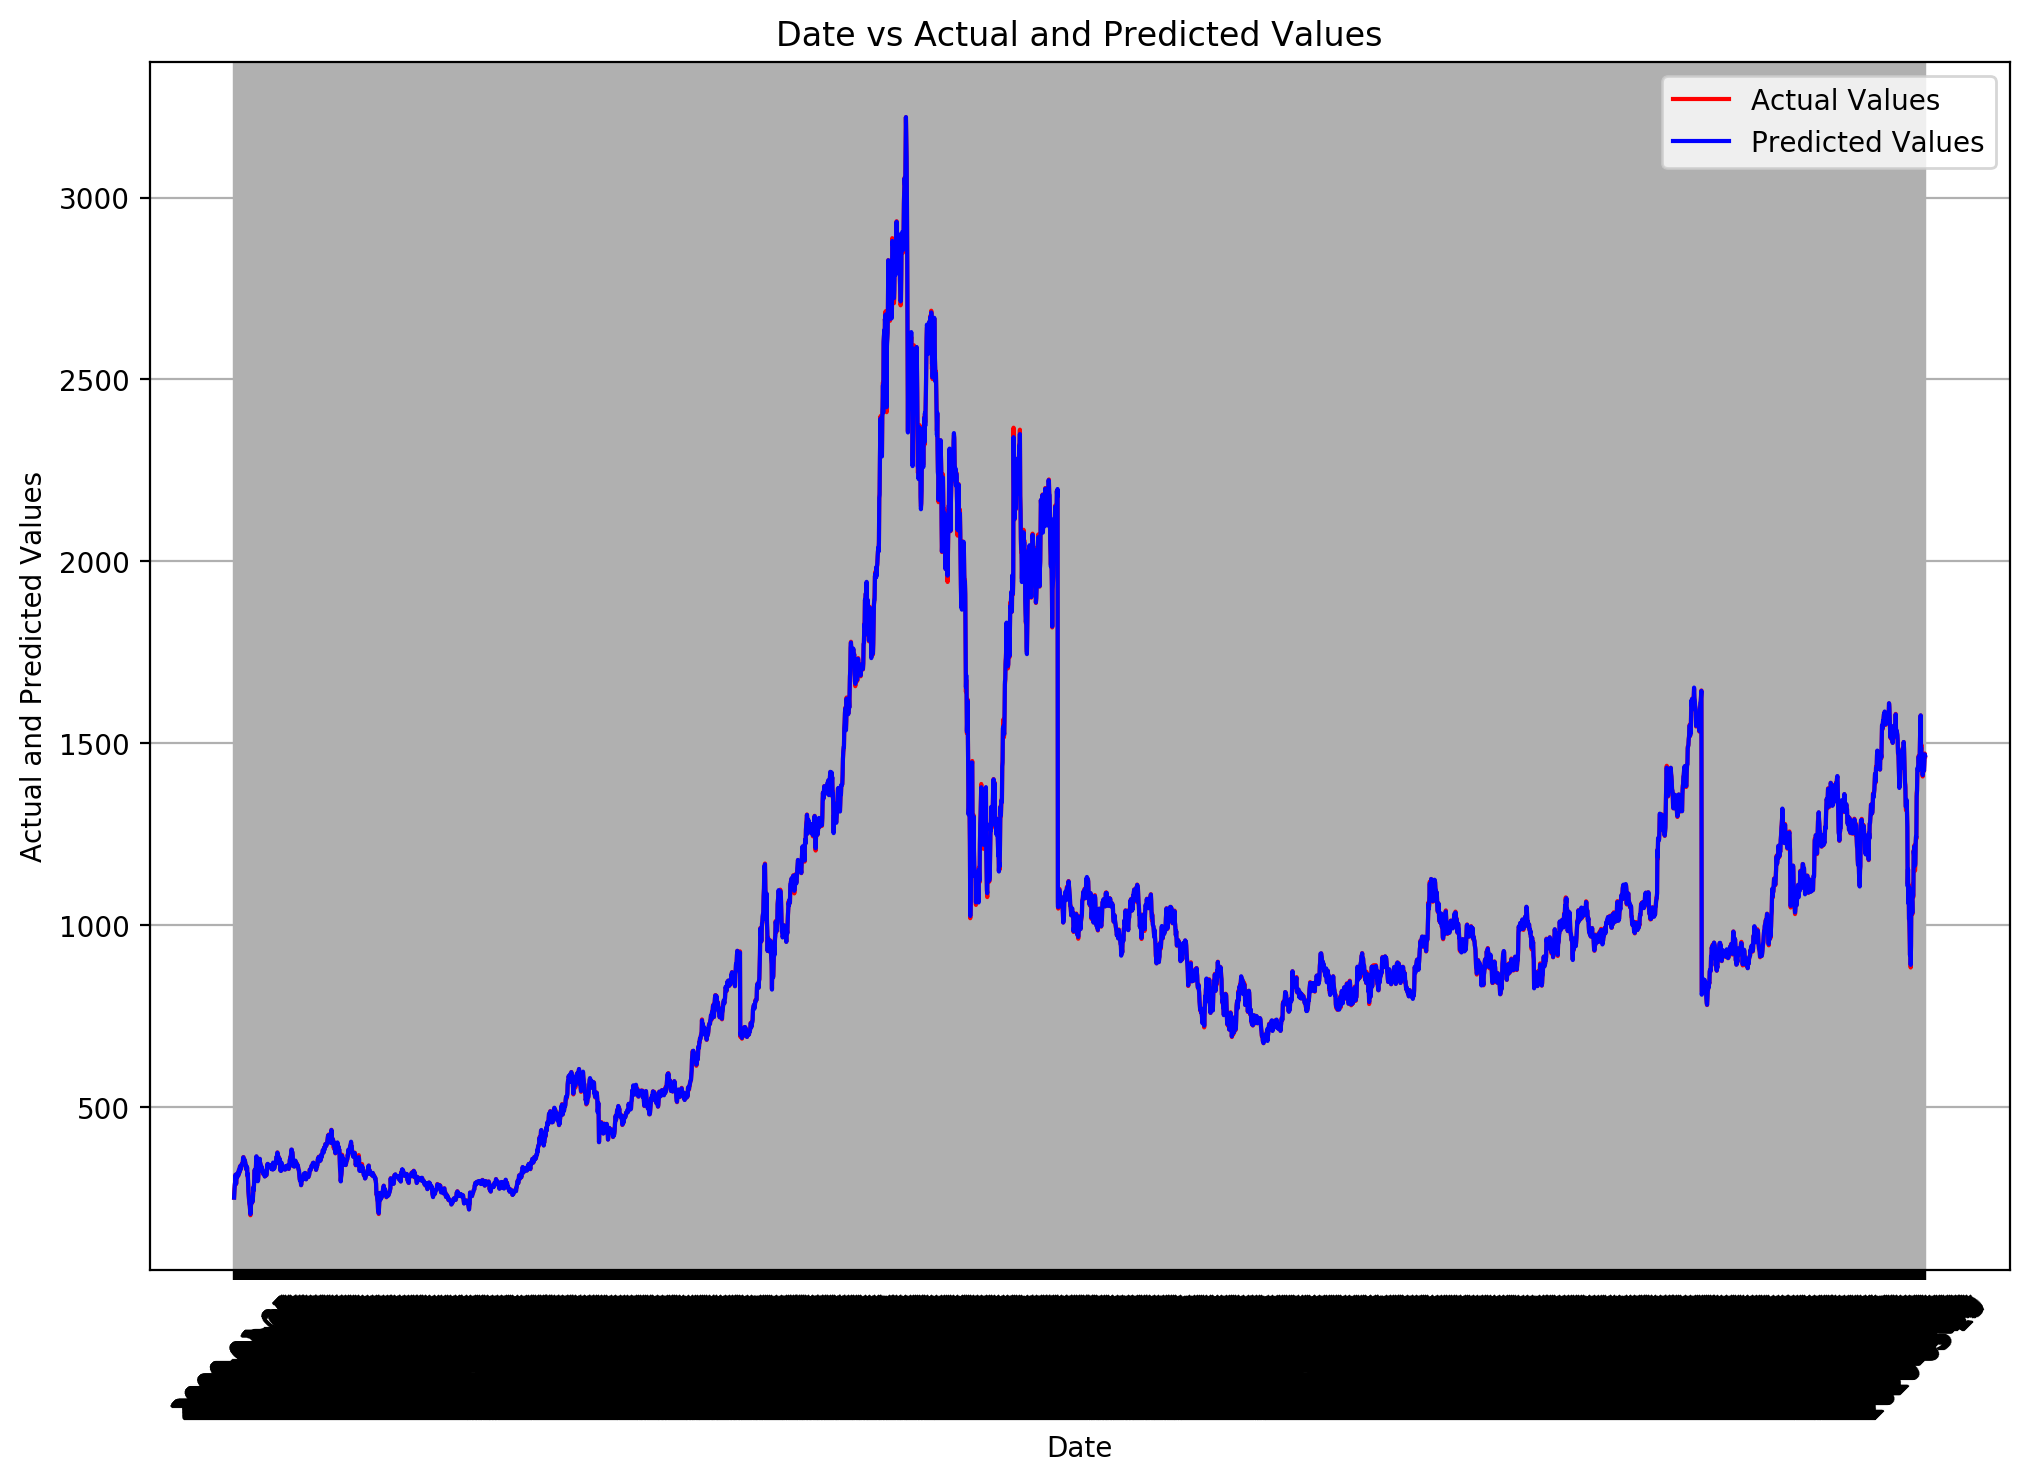

In [12]:
fig = plt.figure(figsize = (12,8), dpi = 200)

ax1 = plt.subplot2grid((8,8),(0,0), rowspan = 8, colspan = 8)

ax1.plot(x1,y, c ='r', linestyle = 'solid', label = 'Actual Values')
ax1.plot(x1,y_pred, c ='b', linestyle = 'solid', label = 'Predicted Values')
plt.title('Date vs Actual and Predicted Values')
plt.xticks(rotation=45)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.ylabel('Actual and Predicted Values')
plt.grid(True)

In [14]:
x1 = df['Date']
y2 = df['High']
y3 = df['Low']

trace0 = go.Scatter(x = x1, y = y2, mode = 'lines+markers', name = 'High')
trace1 = go.Scatter(x = x1, y = y3, mode = 'lines+markers', name = 'Low')

data = go.Figure([trace0,trace1])

data.show()